In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('/content/drive/MyDrive/SunBaseData/customer_churn_large_dataset.xlsx')

In [4]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
data.shape

(100000, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
data.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
5%,5000.950000,20.000000,2.000000,33.530000,72.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
90%,90000.100000,65.000000,22.000000,93.080000,456.000000,1.000000
95%,95000.050000,68.000000,23.000000,96.510000,478.000000,1.000000


In [8]:
nan_rows = data[data.isnull().any(axis=1)]
nan_rows

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [9]:
data['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [10]:
categorical_variables = [col for col in data.columns if col in "O"
                        or data[col].nunique() <=11
                        and col not in "Churn"]

categorical_variables

['Gender', 'Location']

In [11]:
numeric_variables = [col for col in data.columns if data[col].dtype != "object"
                        and data[col].nunique() >11
                        and col not in "CustomerID"]
numeric_variables

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

In [12]:
data["Churn"].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [13]:
churn = data.loc[data["Churn"]==1]

In [14]:
not_churn = data.loc[data["Churn"]==0]

In [15]:
not_churn.Location.value_counts().sort_values()

New York        9834
Miami           9955
Chicago        10013
Los Angeles    10161
Houston        10258
Name: Location, dtype: int64

In [16]:
churn.Location.value_counts().sort_values()

Los Angeles     9880
Houston         9899
Chicago         9945
New York        9979
Miami          10076
Name: Location, dtype: int64

In [17]:
not_churn["Gender"].value_counts().sort_values()

Male      24949
Female    25272
Name: Gender, dtype: int64

In [18]:
churn["Gender"].value_counts().sort_values()

Male      24835
Female    24944
Name: Gender, dtype: int64

In [19]:
not_churn["Subscription_Length_Months"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    50221.000000
mean        12.474045
std          6.918075
min          1.000000
5%           2.000000
25%          6.000000
50%         12.000000
75%         18.000000
90%         22.000000
95%         23.000000
99%         24.000000
max         24.000000
Name: Subscription_Length_Months, dtype: float64

In [20]:
churn["Subscription_Length_Months"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    49779.000000
mean        12.506298
std          6.934943
min          1.000000
5%           2.000000
25%          7.000000
50%         13.000000
75%         19.000000
90%         22.000000
95%         23.000000
99%         24.000000
max         24.000000
Name: Subscription_Length_Months, dtype: float64

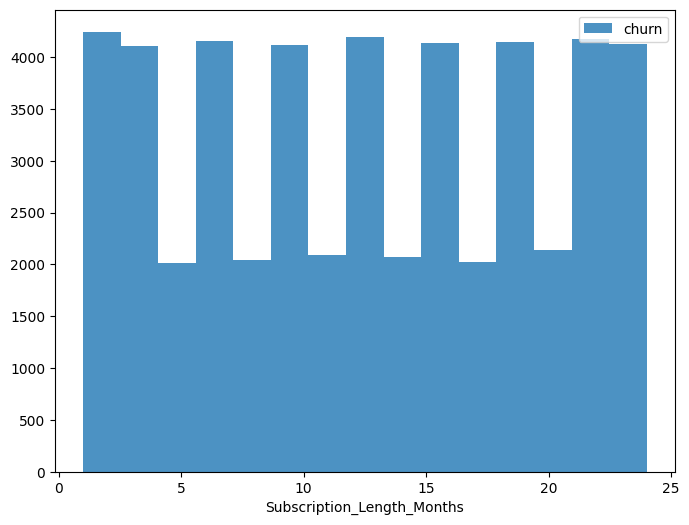

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xlabel('Subscription_Length_Months')
plt.hist(churn["Subscription_Length_Months"],bins=15, alpha=0.8, label='churn')
plt.legend(loc='upper right')
plt.show()

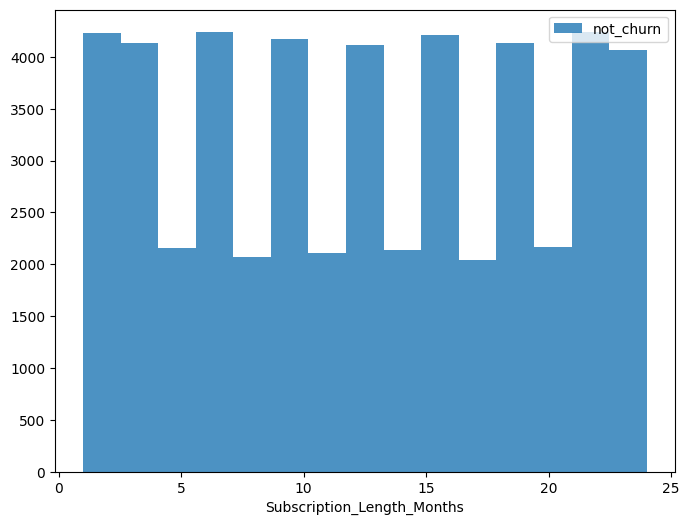

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xlabel('Subscription_Length_Months')
plt.hist(not_churn["Subscription_Length_Months"],bins=15, alpha=0.8, label='not_churn')
plt.legend(loc='upper right')
plt.show()

In [23]:
not_churn["Monthly_Bill"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    50221.000000
mean        65.057453
std         20.179770
min         30.000000
5%          33.550000
25%         47.560000
50%         65.060000
75%         82.580000
90%         92.980000
95%         96.410000
99%         99.260000
max        100.000000
Name: Monthly_Bill, dtype: float64

In [24]:
churn["Monthly_Bill"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    49779.000000
mean        65.048903
std         20.282146
min         30.000000
5%          33.500000
25%         47.520000
50%         64.950000
75%         82.690000
90%         93.200000
95%         96.620000
99%         99.320000
max        100.000000
Name: Monthly_Bill, dtype: float64

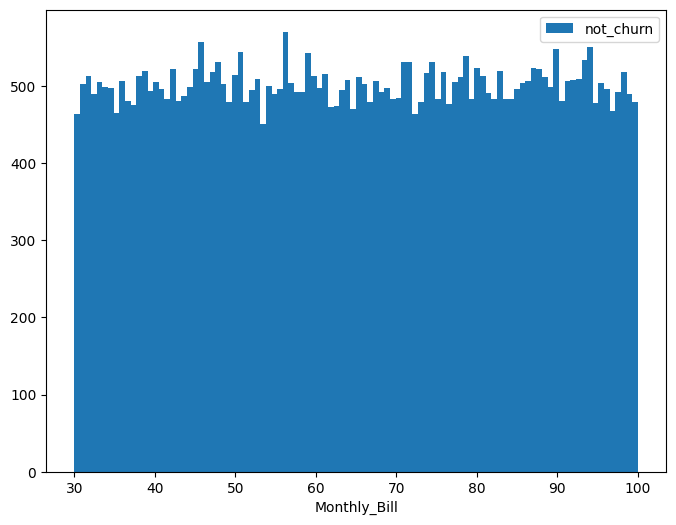

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xlabel('Monthly_Bill')
plt.hist(not_churn["Monthly_Bill"],bins=100, label='not_churn')
plt.legend(loc='upper right')
plt.show()

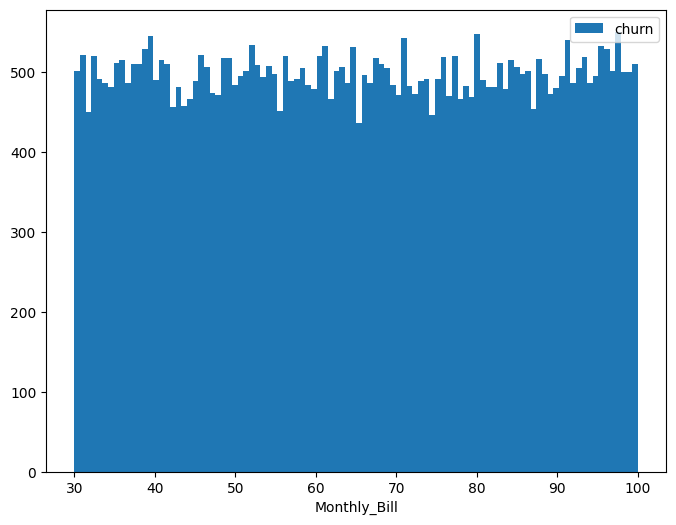

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xlabel('Monthly_Bill')
plt.hist(churn["Monthly_Bill"],bins=100, label='churn')
plt.legend(loc='upper right')
plt.show()

In [27]:
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    50221.000000
mean        44.003305
std         15.289008
min         18.000000
5%          20.000000
25%         31.000000
50%         44.000000
75%         57.000000
90%         65.000000
95%         68.000000
99%         70.000000
max         70.000000
Name: Age, dtype: float64

In [28]:
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    49779.000000
mean        44.050945
std         15.271592
min         18.000000
5%          20.000000
25%         31.000000
50%         44.000000
75%         57.000000
90%         65.000000
95%         68.000000
99%         70.000000
max         70.000000
Name: Age, dtype: float64

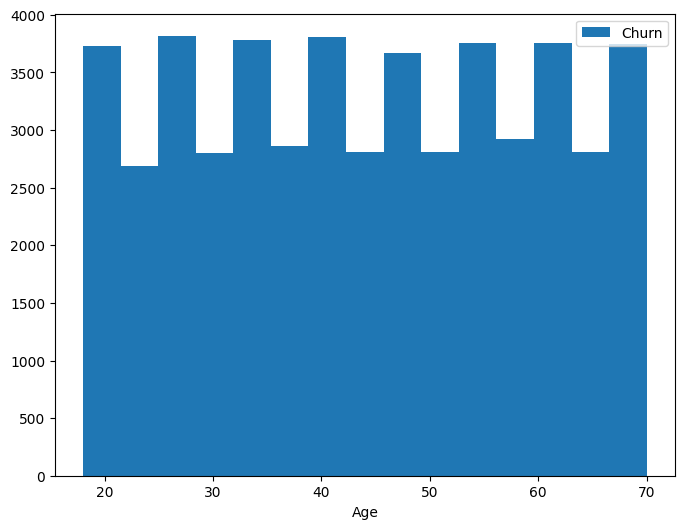

In [29]:
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.hist(churn["Age"],bins=15, label='Churn')
plt.legend(loc='upper right')
plt.show()

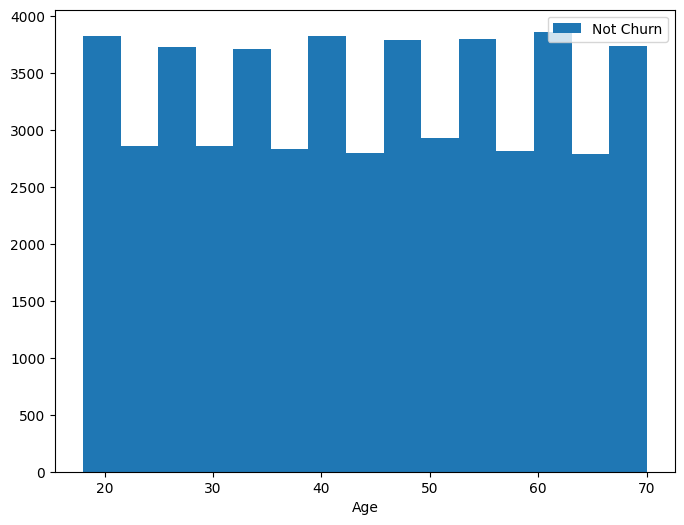

In [30]:
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.hist(not_churn["Age"],bins=15, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

<ipython-input-31-a35f95140cf5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = data.corr().nlargest(k, 'Churn')['Churn'].index


<Axes: >

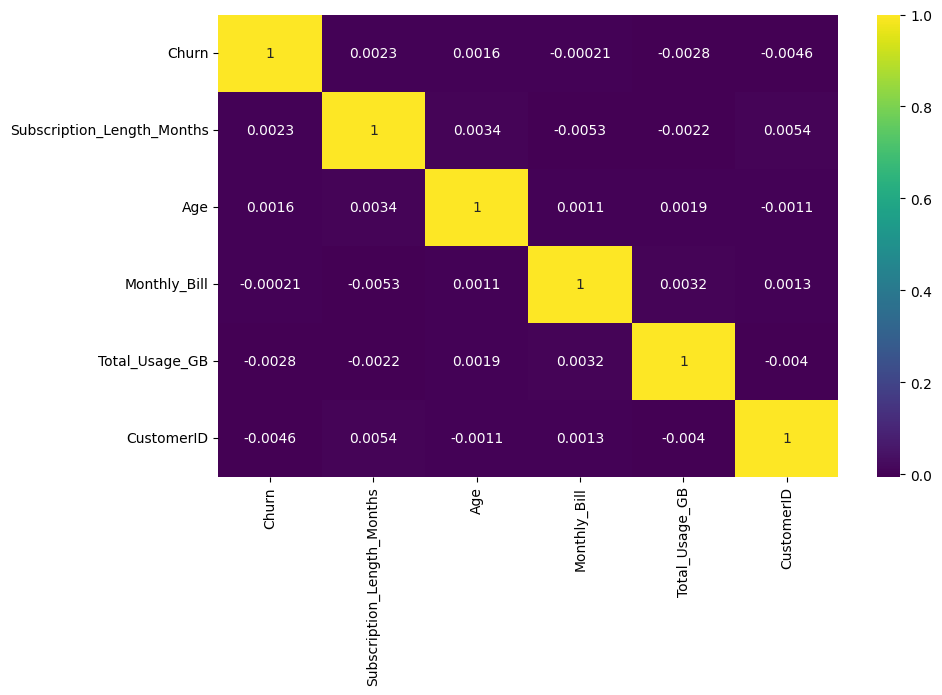

In [31]:
import seaborn as sns
# Exited correlation matrix
k = 10 #number of variables for heatmap
cols = data.corr().nlargest(k, 'Churn')['Churn'].index
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [32]:
data.isnull().any()

CustomerID                    False
Name                          False
Age                           False
Gender                        False
Location                      False
Subscription_Length_Months    False
Monthly_Bill                  False
Total_Usage_GB                False
Churn                         False
dtype: bool

In [33]:
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [34]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [35]:
for var in numeric_variables:
    print(var, "has " , has_outliers(data, [var]),  "Outliers")

Age has  None Outliers
Subscription_Length_Months has  None Outliers
Monthly_Bill has  None Outliers
Total_Usage_GB has  None Outliers


In [36]:
data["NewMonthly_Bill"] = pd.qcut(data['Monthly_Bill'], 6, labels = [1, 2, 3, 4, 5, 6])
data["NewAgeScore"] = pd.qcut(data['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
data["NewTotal_Usage_GB"] = pd.qcut(data['Total_Usage_GB'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])


In [37]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,NewMonthly_Bill,NewAgeScore,NewTotal_Usage_GB
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,4,7,3
1,2,Customer_2,62,Female,New York,1,48.76,172,0,2,7,2
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,5,1,5
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,6,3,3
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,3,5,3


In [38]:
list = ["Gender", "Location"]
data = pd.get_dummies(data, columns =list, drop_first = True)

In [39]:
data.head()

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,NewMonthly_Bill,NewAgeScore,NewTotal_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,17,73.36,236,0,4,7,3,1,0,1,0,0
1,2,Customer_2,62,1,48.76,172,0,2,7,2,0,0,0,0,1
2,3,Customer_3,24,5,85.47,460,0,5,1,5,0,0,1,0,0
3,4,Customer_4,36,3,97.94,297,1,6,3,3,0,0,0,1,0
4,5,Customer_5,46,19,58.14,266,0,3,5,3,0,0,0,1,0


In [40]:
data = data.drop(["Name"], axis = 1)

In [41]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [42]:
new_cols_ohe = ["Location_Houston",	"Location_Los Angeles",	"Location_Miami",	"Location_New York"]
like_num = [col for col in data.columns if data[col].dtypes != 'O' and len(data[col].value_counts()) <= 10]
cols_need_scale = [col for col in data.columns if col not in new_cols_ohe
                   and col not in "Churn"
                   and col not in like_num]

for col in cols_need_scale:
    data[col] = robust_scaler(data[col])

In [43]:
data.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,NewMonthly_Bill,NewAgeScore,NewTotal_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,-1.0,0.731,0.385,0.238,-0.168,0,4,7,3,1,0,1,0,0
1,-1.0,0.692,-0.846,-0.463,-0.451,0,2,7,2,0,0,0,0,1
2,-1.0,-0.769,-0.538,0.583,0.823,0,5,1,5,0,0,1,0,0
3,-1.0,-0.308,-0.692,0.938,0.102,1,6,3,3,0,0,0,1,0
4,-1.0,0.077,0.538,-0.196,-0.035,0,3,5,3,0,0,0,1,0


In [44]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV


In [46]:
X = data.drop("Churn",axis=1)
y = data["Churn"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
# Models for Classification
models = [('LR', LogisticRegression(random_state=123456)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456))]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.504980 (0.005551)
KNN: 0.503480 (0.004251)
CART: 0.502920 (0.003831)
RF: 0.501680 (0.005295)


In [47]:
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[6262, 6232],
       [3739, 3767]])

In [48]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  3767
True Negative :  6262
False Positive:  6232
False Negative:  3739


In [49]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56     12494
           1       0.38      0.50      0.43      7506

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.53      0.50      0.51     20000



In [50]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

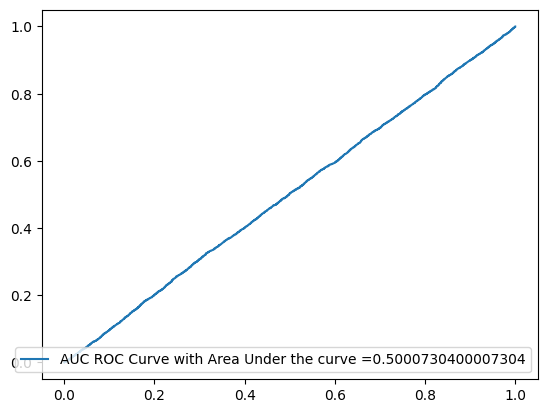

In [51]:
generate_auc_roc_curve(model_GB, X_test)

In [52]:
# LightGBM:
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 49779, number of negative: 50221
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497790 -> initscore=-0.008840
[LightGBM] [Info] Start training from score -0.008840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [53]:
#Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)

In [54]:
# evaluate each model in turn
models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 44802, number of negative: 45198
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 90000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497800 -> initscore=-0.008800
[LightGBM] [Info] Start training from score -0.008800
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 39780, number of negative: 40220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497250 -> initscore=-0.011000
[LightGBM] [Info] Start training from score -0.011000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

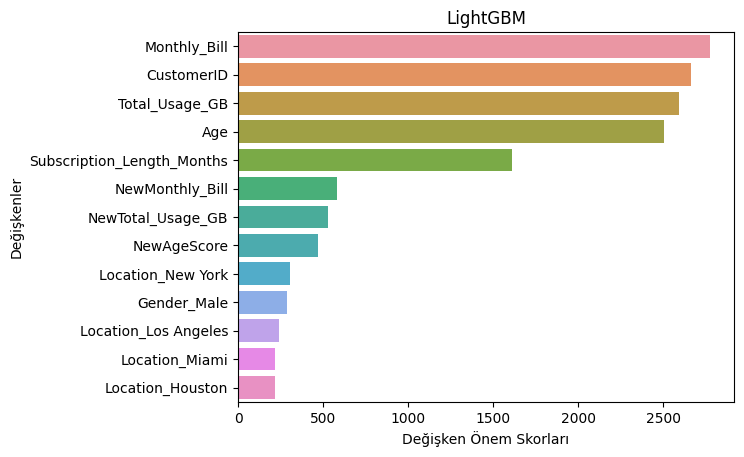

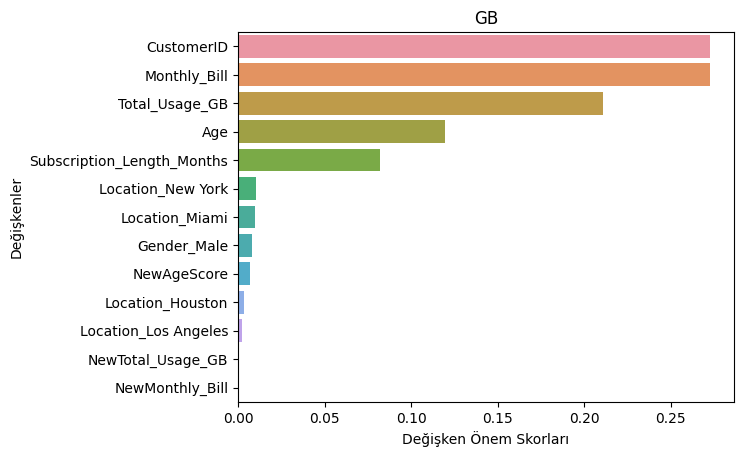

In [55]:
for name, model in models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()